In [3]:
import pandas as pd
import numpy as np

In [4]:
def run_clean_code():
    AI = pd.read_csv('AI_Resume_Screening.csv')
    AI = AI.replace(np.nan, 'None')
    AIrD = pd.DataFrame(AI)

    # dont need resume id or name
    AIrD = AIrD.drop(labels=['Resume_ID', 'Name'], axis=1)

    # ----- education
    AIrD['Education'] = AIrD['Education'].astype(str).str.strip().str.lower()

    education_mapping = {
        'b.sc': 1,
        'b.tech': 2,
        'btech': 2,        # just in case
        'mba': 3,
        'm.tech': 4,
        'phd': 5
    }

    AIrD['Education'] = AIrD['Education'].map(education_mapping)

    AIrD = AIrD.dropna(subset=['Education'])

    # ----- recruiter decision: 1 hired 0 rejected
    AIrD['Recruiter Decision'] = AIrD['Recruiter Decision'].astype(str).str.strip().str.lower()

    AIrD['Recruiter Decision'] = AIrD['Recruiter Decision'].map({
        'hire': 1,
        'reject': 0
    })

    AIrD = AIrD.dropna(subset=['Recruiter Decision'])

    AIrD = AIrD.reset_index(drop=True)

    return AIrD

AIrD = run_clean_code()
AIrD


,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,"TensorFlow, NLP, Pytorch",10,1,None,AI Researcher,1,104895,8,100
1,"Deep Learning, Machine Learning, Python, SQL",10,3,Google ML,Data Scientist,1,113002,1,100
2,"Ethical Hacking, Cybersecurity, Linux",1,3,Deep Learning Specialization,Cybersecurity Analyst,1,71766,7,70
3,"Python, Pytorch, TensorFlow",7,2,AWS Certified,AI Researcher,1,46848,0,95
4,"SQL, React, Java",4,5,None,Software Engineer,1,87441,9,100
...,...,...,...,...,...,...,...,...,...
995,"Cybersecurity, Linux, Ethical Hacking",0,1,None,Cybersecurity Analyst,0,114364,9,60
996,"Deep Learning, Machine Learning",0,3,Deep Learning Specialization,Data Scientist,0,103294,5,45
997,"TensorFlow, NLP",0,2,Google ML,AI Researcher,1,113855,9,65
998,"Linux, Networking, Cybersecurity, Ethical Hacking",8,5,AWS Certified,Cybersecurity Analyst,1,83146,10,100


In [5]:
AIrD.to_csv('cleaned_AI_resume_data.csv', index=False)

In [6]:
AIrD[(AIrD['AI Score (0-100)'] <= 60) & (AIrD['Recruiter Decision'] == 1)].shape

(0, 9)

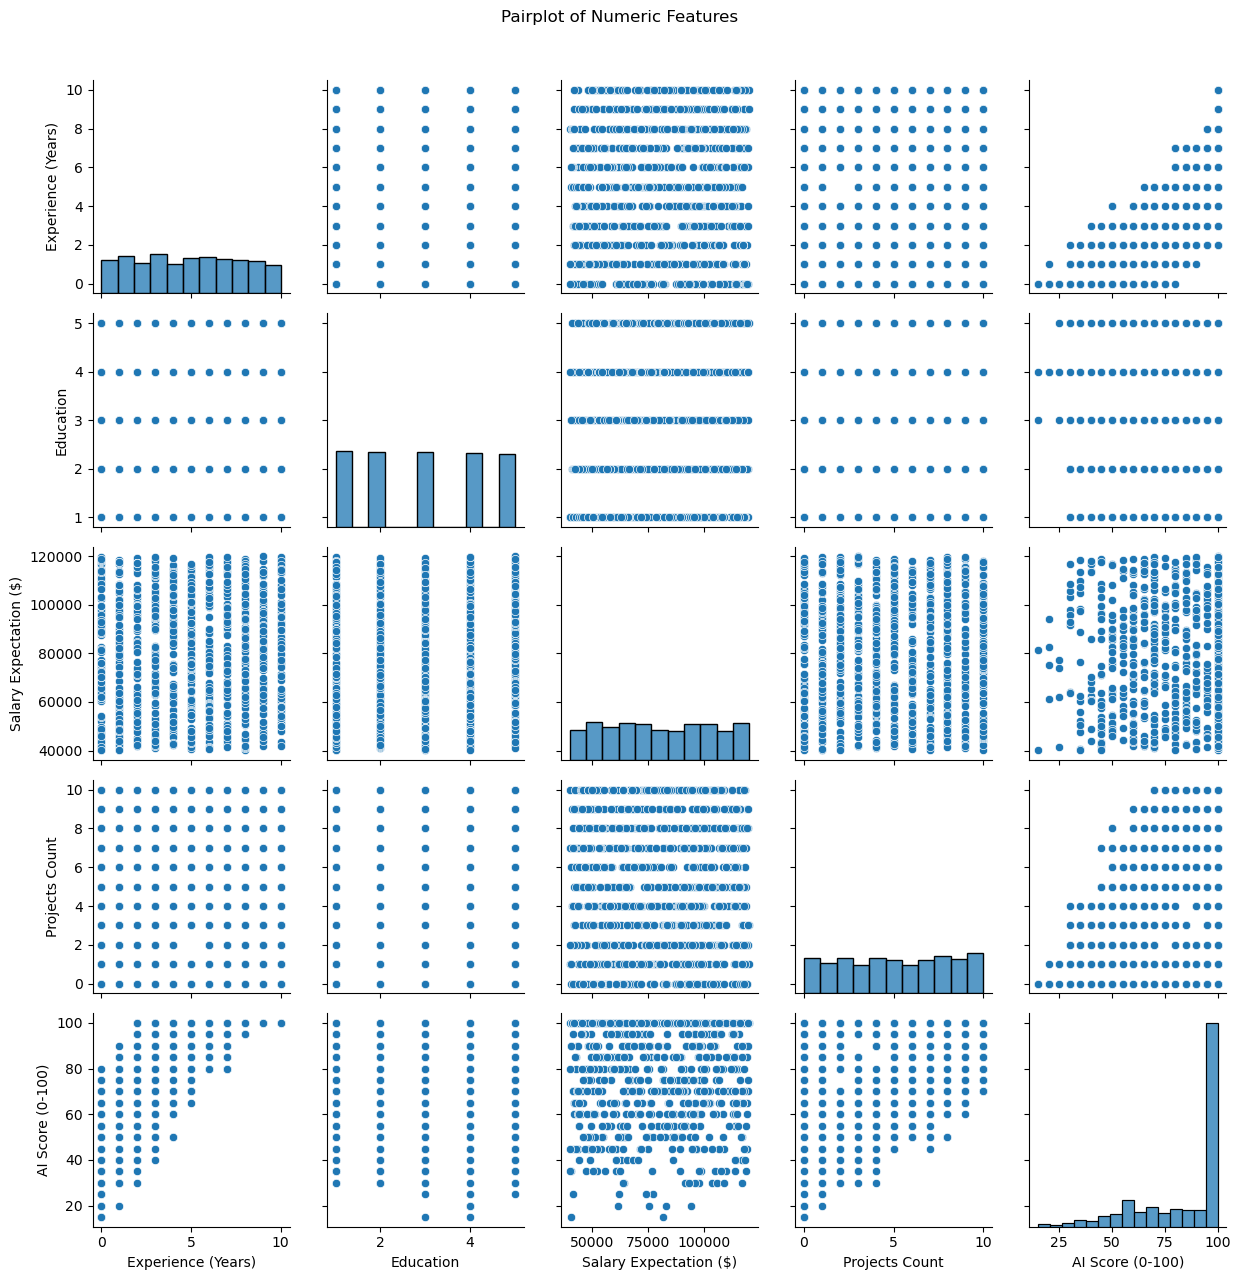

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the DataFrame
df = pd.DataFrame(AIrD)

# Select numeric columns for pairplot
numeric_columns = ['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

# Create pairplot
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


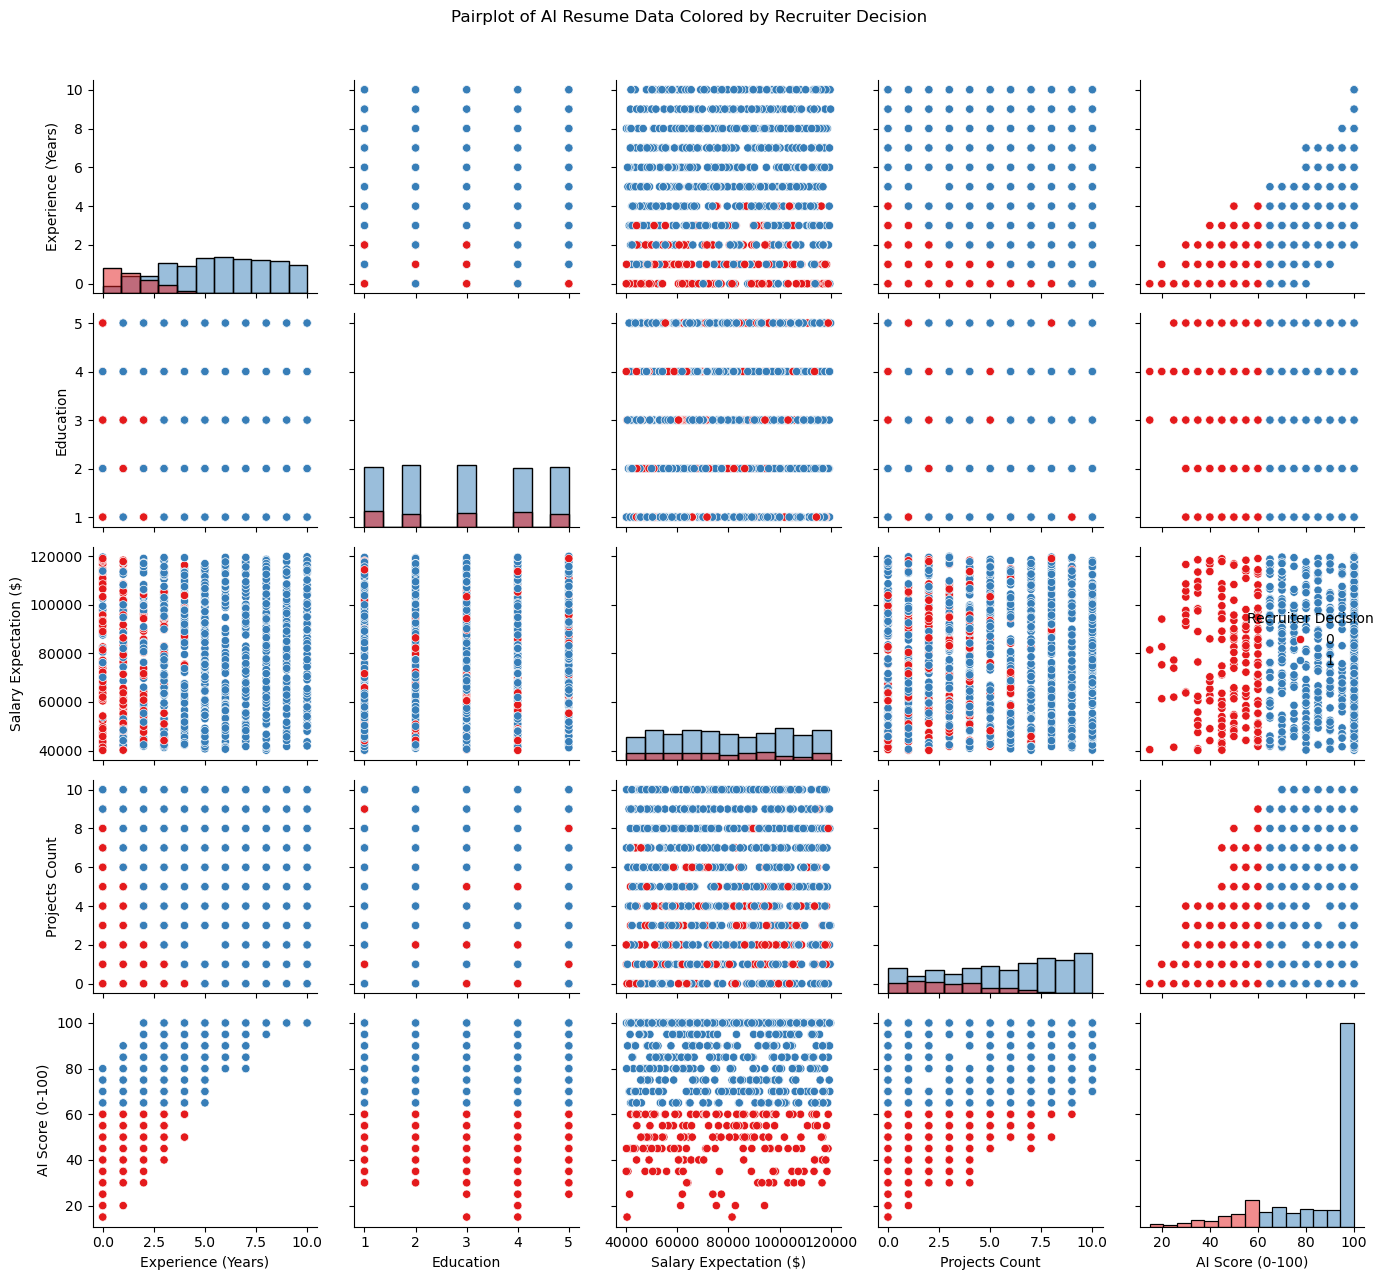

In [8]:
# Recreate the pairplot using the AIrD DataFrame with the actual column names
# Assuming AIrD is already defined in the environment, using only relevant numeric columns

# Select numeric columns
numeric_cols = ['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

# Generate pairplot
sns.pairplot(
    AIrD,
    vars= numeric_cols,
    hue='Recruiter Decision',
    palette='Set1',
    diag_kind='hist'
)
plt.suptitle("Pairplot of AI Resume Data Colored by Recruiter Decision", y=1.02)
plt.tight_layout()
plt.show()

In [9]:
import plotly.express as px

fig = px.scatter(
    AIrD, 
    x='AI Score (0-100)', 
    y='Salary Expectation ($)',
    color='Recruiter Decision',
    hover_data=['Experience (Years)', 'Education', 'Projects Count'],
    title='Interactive: AI Score vs Salary'
)
fig.show()

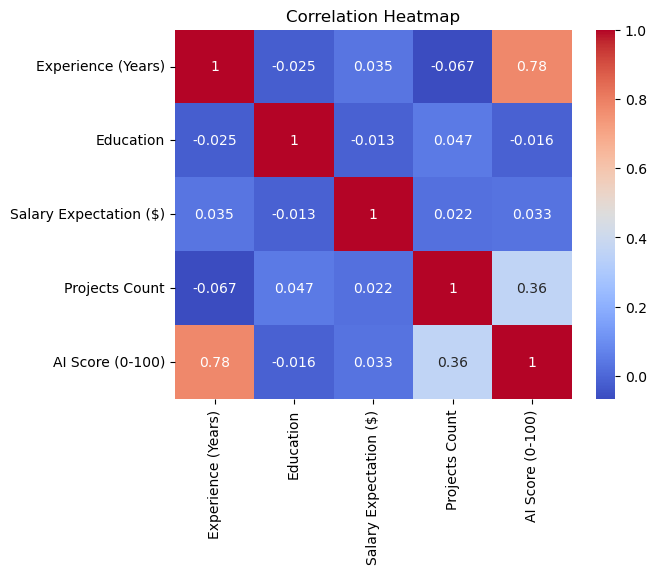

In [10]:
corr = AIrD[['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [29]:
AIrD = run_clean_code()
AIrD['Certifications'] = AIrD['Certifications'].map({
        'None': 0,
        'Google ML': 1, 
        'Deep Learning Specialization': 2, 
        'AWS Certified': 3
    })
#AIrD['Skills'].unique()

In [11]:
#logistic Regression, Naive Bayes, Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

%pip install graphviz
import graphviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
# LOGISTIC REGRESSION - looking at pair plot, decided to use features: experince, projects, and ai score
X = AIrD[['AI Score (0-100)', 'Experience (Years)', 'Education']]
y = AIrD['Recruiter Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 46,   0],
       [  0, 154]], dtype=int64)

In [13]:
y.value_counts()

Recruiter Decision
1    812
0    188
Name: count, dtype: int64

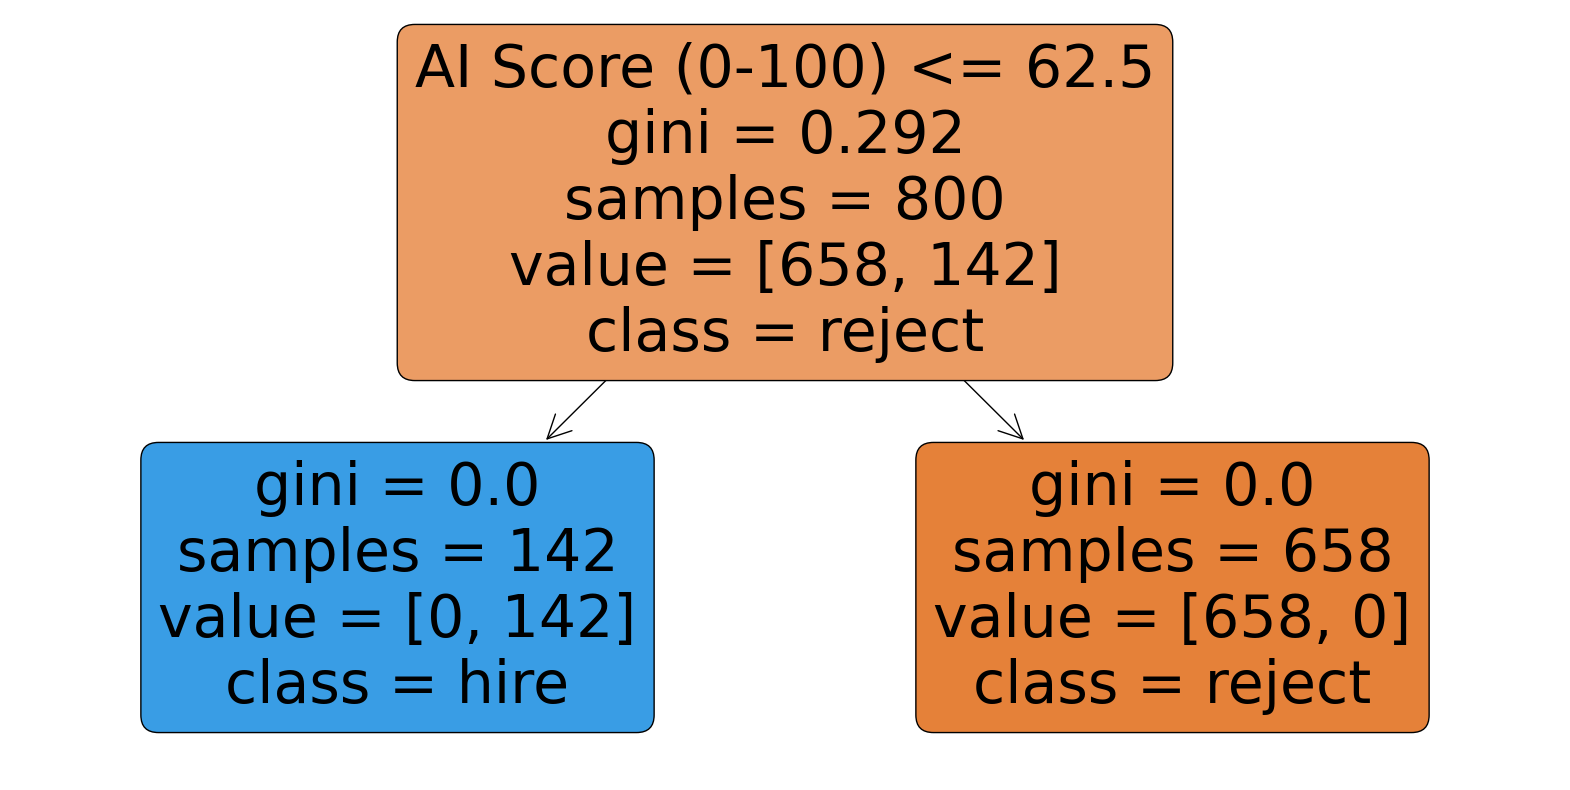

In [ ]:
# DECISION TREE -
AIrD = run_clean_code()
# First: split the skills string into a list
AIrD['Skills'] = AIrD['Skills'].astype(str).str.lower().str.split(',')
# Then: remove extra spaces
AIrD['Skills'] = AIrD['Skills'].apply(lambda skills: [skill.strip() for skill in skills])
# Create dummy variables manually
skills_dummies = AIrD['Skills'].apply(lambda x: pd.Series(1, index=x))
# Combine (fill NaN with 0)
skills_dummies = skills_dummies.fillna(0)
AIrD = AIrD.drop('Skills', axis=1).join(skills_dummies)
####

X = AIrD.drop(labels= ['Recruiter Decision', "Job Role"], axis=1)
y = AIrD['Recruiter Decision']

y = y.map({
        1:'hire',
        0: 'reject'
    })

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='gini')
X_train_encoded = pd.get_dummies(X_train, columns=['Certifications'])
clf.fit(X_train_encoded, y_train)


import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_train_encoded.columns, class_names=['reject', 'hire'], filled=True, rounded=True)
plt.show()


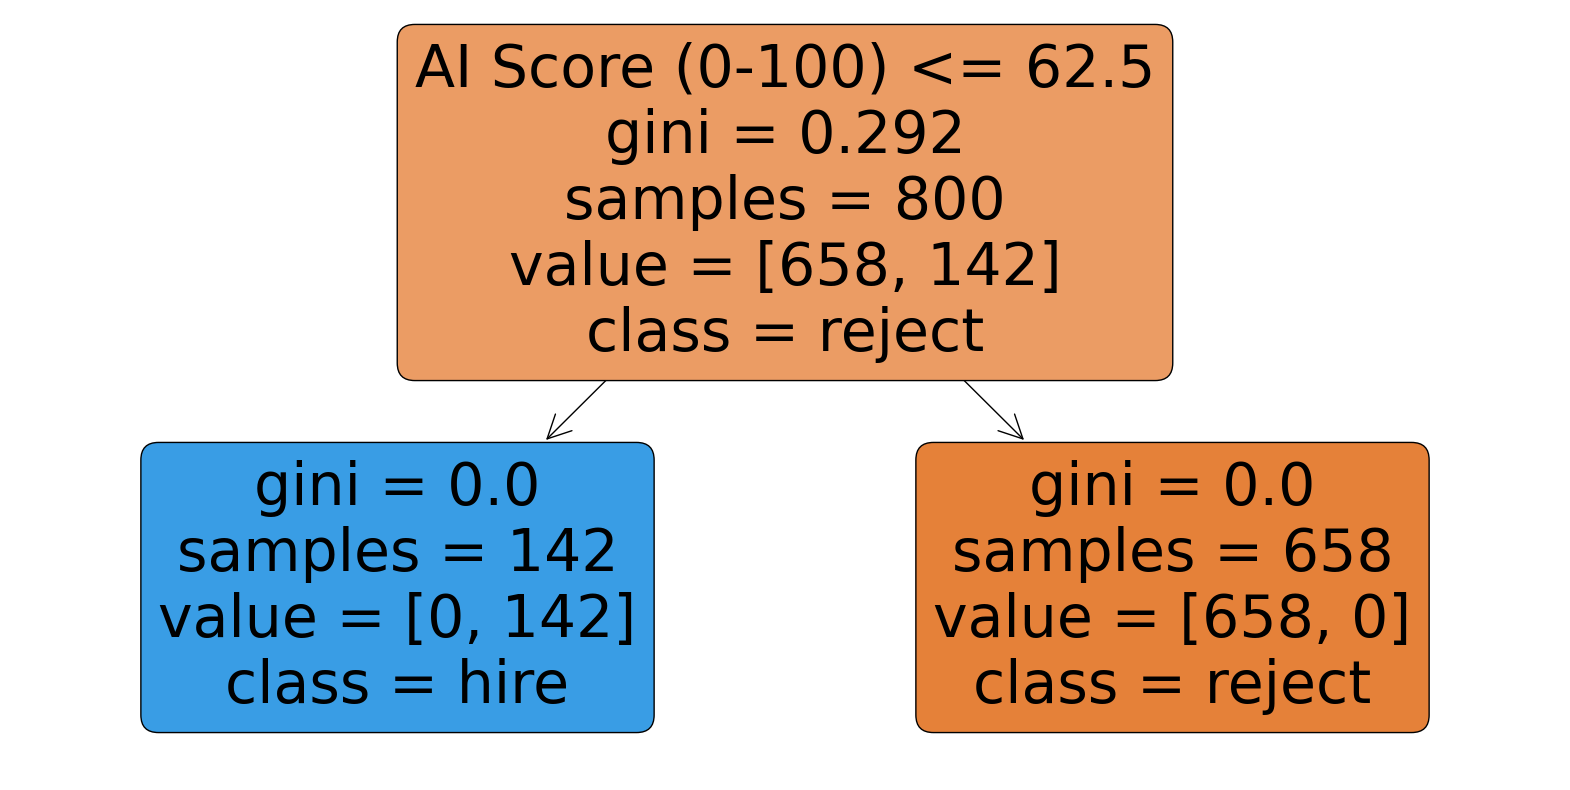

In [21]:
# DECISION TREE -
AIrD = run_clean_code()
# First: split the skills string into a list
AIrD['Skills'] = AIrD['Skills'].astype(str).str.lower().str.split(',')
# Then: remove extra spaces
AIrD['Skills'] = AIrD['Skills'].apply(lambda skills: [skill.strip() for skill in skills])
# Create dummy variables manually
skills_dummies = AIrD['Skills'].apply(lambda x: pd.Series(1, index=x))
# Combine (fill NaN with 0)
skills_dummies = skills_dummies.fillna(0)
AIrD = AIrD.drop('Skills', axis=1).join(skills_dummies)
####

#X=AIrD.drop(labels= ['Recruiter Decision', "Job Role", "AI Score (0-100)"], axis=1)
X = AIrD[['AI Score (0-100)', 'Experience (Years)', 'Education', 'Projects Count']]
y = AIrD['Recruiter Decision']

y = y.map({
        1:'hire',
        0: 'reject'
    })

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='gini')
#X_train_encoded = pd.get_dummies(X_train, columns=['Certifications'])
clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['reject', 'hire'], filled=True, rounded=True)
plt.show()

In [ ]:
#random code I just kept, can be deleted

'''
graph_data = tree.export_graphviz(clf, out_file=None, feature_names=list(X_train_encoded.columns),
                                   class_names=list(set(y_train)), filled=True, rounded=True)

'''

graph_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=list(X_train_encoded.columns),
    class_names=['Reject', 'Hire'],  # 👈 manually pass the string names
    filled=True,
    rounded=True
)

graph = graphviz.Source(graph_data)
#graph.render("decision_tree")  # This will save as 'decision_tree.pdf'
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH